In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

In [2]:
import numpy as np
import rasterio as rio
from matplotlib import pyplot as plt

In [3]:
from multiprocessing import Process
import time

In [4]:
from pyspatialkit.crs.geocrs import GeoCrs

In [12]:
requ_min = [0,1,2]
requ_max = [2,3,3]
ranges = [np.arange(axis_min, axis_max) for axis_min, axis_max in zip(requ_min, requ_max)]
tiles = np.stack([a.flatten() for a in np.meshgrid(*ranges, indexing='ij')], axis=1)

In [11]:
with open('test.txt', 'w') as f:
    with open('test.txt', 'w') as f2:
        f.write('test2')
        f.write('test1')
        print('lol')

lol


In [31]:
t1 = np.array([[1,2],[3,4],[5,6]])
t2 = np.array([[7,8],[1,2],[3,4]])

In [68]:
test = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
x,y,z = np.split(test, 3, axis=1)

In [78]:
tmp = np.array(['t'*10000], dtype=str)

In [85]:
import fcl

In [81]:
import json
crs_str = json.dumps(GeoCrs.from_epsg(4326).to_dict())
crs = GeoCrs.from_dict(json.loads(crs_str))

In [45]:
%time
tmp = np.zeros((0,3))
for i in range(100000):
    tmp = np.append(tmp, [[i,i,i]])

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 7.87 µs


KeyboardInterrupt: 

In [37]:
tmp

array([], shape=(0, 3), dtype=float64)

In [30]:
t = np.array([(1,2), (3,4), (5,6)])
for x in t:
    print(x)

[1 2]
[3 4]
[5 6]


In [29]:
np.array([1,2,3])[:, np.newaxis].shape

(3, 1)

In [19]:
candidates = np.array([[1,2,2],[1,2,3],[1,2,4],[1,2,4],[1,3,1],[1,3,2],[1,3,3]])
candidates = np.unique(np.concatenate([candidates], axis=0), axis=0)
tmp = np.unique(candidates[:, :2], return_index=True, axis=0)[1][1:]
candidates = np.split(candidates, tmp)
candidates

[array([[1, 2, 2],
        [1, 2, 3],
        [1, 2, 4]]),
 array([[1, 3, 1],
        [1, 3, 2],
        [1, 3, 3]])]

In [13]:
tmp = np.split(candidates, np.unique(candidates, axis=0, return_index=True)[1])

In [14]:
tmp

[array([], shape=(0, 3), dtype=int64),
 array([[1, 2, 2]]),
 array([[1, 2, 3]]),
 array([[1, 2, 4],
        [1, 2, 4]]),
 array([[1, 3, 1]]),
 array([[1, 3, 2]]),
 array([[1, 3, 3]])]

In [36]:
tmp = np.concatenate([t1,t2], axis=0)
np.unique(tmp, axis=0)

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [26]:
np.__version__

'1.21.5'

In [1]:
def f(name):
    time.sleep(10)
    print('hello', name)

In [6]:
class TestClass:
    @classmethod
    def TestFunction(cls, a):
        return a

In [7]:
import inspect

In [14]:
str(inspect.signature(TestClass.TestFunction))

'(a)'

In [20]:
mod_name = inspect.getmodule(f).__name__

In [21]:
mod_name

'__main__'

In [22]:
import importlib
module = importlib.import_module(mod_name)
getattr(module, 'f')

In [30]:
isinstance(3, (float, int))

True

In [16]:
p = Process(target=f, args=('bob',))
p.start()

hello bob


In [4]:
dataset = rio.open("../testdata/dop100rgbi_32_736_5748_2_st_2020.tif")
img = dataset.read()

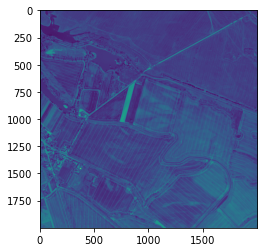

In [6]:
plt.imshow(img[0])

In [42]:
t1 = np.array([1,2,3,4,5,6,7,8])
t1 = t1.reshape([2,2,2])

In [45]:
t1.squeeze()[0,0,0] = 42
t1.shape

(2, 2, 2)

In [23]:
coords = np.stack(np.meshgrid(np.arange(10), np.arange(10), indexing='ij'))

In [21]:
mask = np.zeros((10,10), dtype=bool)
mask[(0,1,3), (2,3,4)] = True

In [24]:
t = coords[:, mask]

In [29]:
if np.ones(3,dtype=bool) & np.ones(3, dtype=bool):
    print('A')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [1]:
from pathlib import Path
import shutil

In [36]:
import tiledb, numpy as np, tempfile
from tiledb.multirange_indexing import _get_pyquery
import pandas as pd

In [3]:
db_path = "./test_tdb"
#shutil.rmtree(db_path)

In [62]:
dim1 = tiledb.Dim(name='x', domain=(0,1000000), tile=10, dtype=np.float64)
dim2 = tiledb.Dim(name='y', domain=(0,1000000), tile=10, dtype=np.float64)
dim3 = tiledb.Dim(name='z', domain=(0,1000000), tile=10, dtype=np.float64)
dom = tiledb.Domain(dim1, dim2, dim3)
schema = tiledb.ArraySchema(domain=dom, sparse=True, attrs=[tiledb.Attr(name='a', dtype=int), tiledb.Attr(name='b', dtype=int), tiledb.Attr(name='c', dtype=int)])
schema.check()
tiledb.Array.create(db_path, schema)

In [63]:
x = np.arange(10000000, dtype=np.float64) / 1000
y = x.copy()
z = x.copy()
a = np.arange(10000000, dtype=np.float64) + 5
b = np.arange(10000000, dtype=np.float64) + 1000000
c = np.arange(10000000, dtype=np.float64) * -1
df = pd.DataFrame({'x':x,'y':y,'z':z,'a':a,'b':b,'c':c})


In [64]:
with tiledb.SparseArray(db_path, mode='w') as db:
    db[x,y,z] = {'a':a, 'b':b, 'c':c}
    #db[tmp2['x'], tmp2['y'], tmp2['z']] = tmp2

In [ ]:
py.init_buffer_bytes

In [75]:
with tiledb.SparseArray(db_path) as db:
    query = db.query(attrs=['a'], return_incomplete=True)
    iterable = query.multi_index[:,:,:]
    iterable.pyquery = _get_pyquery(db, query, iterable.use_arrow)
    iterable.pyquery._preload_metadata = True
    iterable.pyquery.set_ranges(iterable.ranges)
    iterable.pyquery._return_incomplete = (
                iterable.query and iterable.query.return_incomplete
            )
    iterable.pyquery.submit()
    #for t in iterable:
    #    print("Iteration")
    #    tmp = t
    print(iterable.estimated_result_sizes())

{'a': EstimatedResultSize(offsets_bytes=0, data_bytes=80000000), 'x': EstimatedResultSize(offsets_bytes=0, data_bytes=80000000), 'y': EstimatedResultSize(offsets_bytes=0, data_bytes=80000000), 'z': EstimatedResultSize(offsets_bytes=0, data_bytes=80000000)}


In [81]:
iterable.pyquery.__dir__()

['__init__',
 '__doc__',
 '__module__',
 'buffer_dtype',
 'results',
 'set_ranges',
 'set_subarray',
 'set_attr_cond',
 'submit',
 'unpack_buffer',
 'estimated_result_sizes',
 '_allocate_buffers',
 '_get_buffers',
 '_buffer_to_pa',
 '_buffers_to_pa_table',
 '_test_array',
 '_test_err',
 '_preload_metadata',
 '_return_incomplete',
 'is_incomplete',
 '_test_init_buffer_bytes',
 '_test_alloc_max_bytes',
 'retries',
 '__new__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

In [17]:
tmp2.estimated_result_sizes()

TileDBError: Query not initialized

In [24]:
df.to_numpy()

array([[ 1.,  1.,  1.,  1., 11., 21.],
       [ 2.,  2.,  2.,  2., 12., 22.],
       [ 3.,  3.,  3.,  3., 23., 23.]])

In [94]:
img[::2,:].shape

(2, 4)

In [96]:
np.stack([img[::2,::2], img[1::2,::2], img[::2,1::2], img[1::2,1::2]], axis=2).mean(axis=2)

array([[ 3.5,  5.5],
       [11.5, 13.5]])

In [91]:
f = np.ones(10)
np.ceil(f)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [69]:
t.view(np.dtype('i4,i4,i4')) + t2.view(np.dtype('i4,i4,i4'))

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype([('f0', '<i4'), ('f1', '<i4'), ('f2', '<i4')]), dtype([('f0', '<i4'), ('f1', '<i4'), ('f2', '<i4')])) -> dtype([('f0', '<i4'), ('f1', '<i4'), ('f2', '<i4')])

In [65]:
schema = tiledb.ArraySchema(domain=dom, attrs=[(tiledb.Attr(name="a1", dtype=np.int64)),])

In [13]:
ar = tiledb.DenseArray.create(db_path, schema)

In [15]:
type(ar)

NoneType

In [50]:
for i in range(1):
    with tiledb.DenseArray(db_path, mode='r') as A0:
        with tiledb.DenseArray(db_path, mode='w') as A:
            t = np.ones((10,10))
            t[0:10, 5] = 5
            A[100000:100010, 100000:100010] = {"a1": t}
        print(A0[100000:100010, 100000:100010]["a1"])
        #A[1,1] = {'a1', np.ones((1,), dtype=np.int64)}

[[1 1 1 1 1 4 1 1 1 1]
 [1 1 1 1 1 4 1 1 1 1]
 [1 1 1 1 1 4 1 1 1 1]
 [1 1 1 1 1 4 1 1 1 1]
 [1 1 1 1 1 4 1 1 1 1]
 [1 1 1 1 1 4 1 1 1 1]
 [1 1 1 1 1 4 1 1 1 1]
 [1 1 1 1 1 4 1 1 1 1]
 [1 1 1 1 1 4 1 1 1 1]
 [1 1 1 1 1 4 1 1 1 1]]


In [51]:

with tiledb.DenseArray(db_path, mode='r') as A:
        for i in range(100):
                tmp = A[100000:100010, 100000:100010]["a1"]
tmp[0:10, 5]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])